In [15]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [16]:
# download the dataset from source and divide into training and test set

import tensorflow as tf
print(tf.__version__)
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar100.load_data()

(xtr, ytr), (xt, yt) = datasets.cifar100.load_data()

2.8.0


In [17]:
# convert the 2d array output labels into 1D array
ytr = ytr.reshape(-1,)
yt = yt.reshape(-1,)

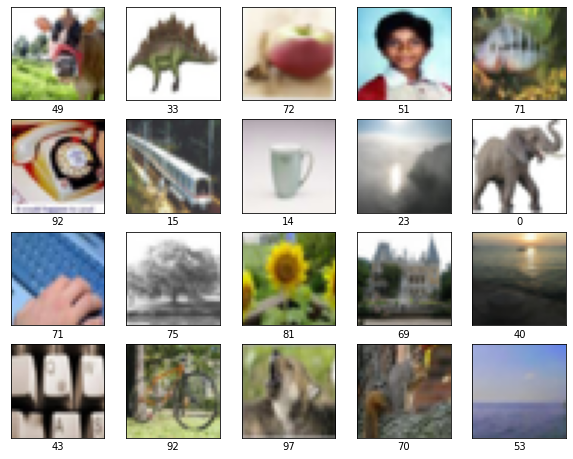

In [18]:
# plot a sample from the training class
plt.figure(figsize=(10,10))
for image in range(0,20):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = xtr[j]
    plt.imshow(data_plot)
    plt.xlabel(str(yt[j]))
plt.show()


In [19]:
# normalizing the training and testing data
xtr = xtr/255
xt = xt/255

In [20]:

model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [21]:
opt = 'adam'

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(xtr, ytr, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 42s 26ms/step - loss: 3.4977 - accuracy: 0.1737
Epoch 2/25
1563/1563 [==============================] - 42s 27ms/step - loss: 2.7262 - accuracy: 0.3110
Epoch 3/25
1563/1563 [==============================] - 40s 26ms/step - loss: 2.3724 - accuracy: 0.3859
Epoch 4/25
1563/1563 [==============================] - 40s 26ms/step - loss: 2.0986 - accuracy: 0.4438
Epoch 5/25
1563/1563 [==============================] - 40s 26ms/step - loss: 1.8457 - accuracy: 0.4992
Epoch 6/25
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6085 - accuracy: 0.5550
Epoch 7/25
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3830 - accuracy: 0.6082
Epoch 8/25
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1737 - accuracy: 0.6625
Epoch 9/25
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9867 - accuracy: 0.7065
Epoch 10/25
1563/1563 [==============================] - 41s 26m

In [22]:
test_loss,test_acc=model.evaluate(xt, yt)
print("test accuracy: ",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 7.4612 - accuracy: 0.3379
test accuracy:  0.3379000127315521


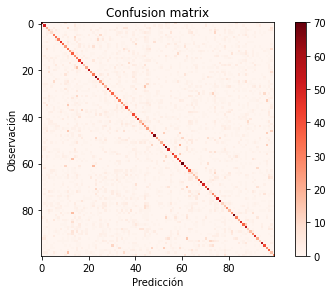

In [23]:

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')
Y_pred = model.predict(xt)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
confusion_mtx = confusion_matrix(yt, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(100))